In [2]:
# Required Libraries
# !pip install hdbscan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, calinski_harabasz_score, v_measure_score, completeness_score
from sklearn.neighbors import NearestNeighbors
import hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 19.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039289 sha256=ff96bd51c7d08f33d408ac1142bbba97139e317427edfbef86069d2408ceab51
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.7
    Uninstalling Cython-3.0.7:
      Successfully uninstalled Cython-3.0.7


## Manual Dataset

In [ ]:
data, labels = make_blobs(n_samples = 1000, n_features = 2, centers = 5)

# check if the data is correctly created
print(f'number of samples: {len(data)}\nnumber of features: {len(data[1])}\nNumber of clusters: {np.unique(labels)}')

number of samples: 1000
number of features: 2
Number of clusters: [0 1 2 3 4]


In [ ]:
# Organizing the created data
df = pd.DataFrame(data, columns = ["Feature 1", "Feauture 2"])
df["Labels"] = labels
df.head()

,Feature 1,Feauture 2,Labels
0,-4.687919,0.046827,0
1,-6.974943,5.850974,1
2,-5.969128,-7.285370,3
3,-3.967636,-9.182638,3
4,-6.389452,-9.204852,3


In [ ]:
data = df.iloc[:, 0:2].values
data.shape

(1000, 2)

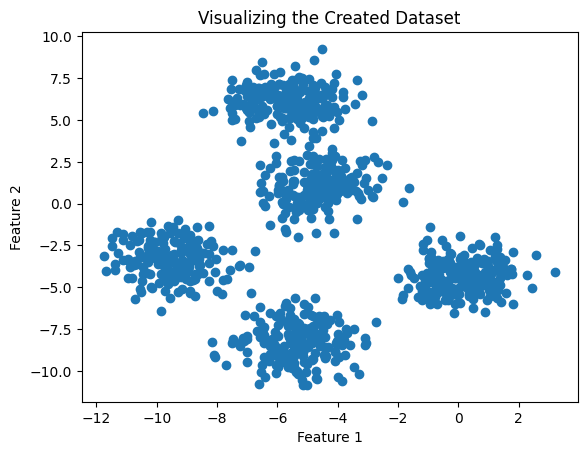

<Figure size 1000x1000 with 0 Axes>

In [ ]:
plt.scatter (data[:, 0], data[:, 1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Visualizing the Created Dataset")
plt.figure(figsize = (10, 10))
plt.show()

### K_Means ###

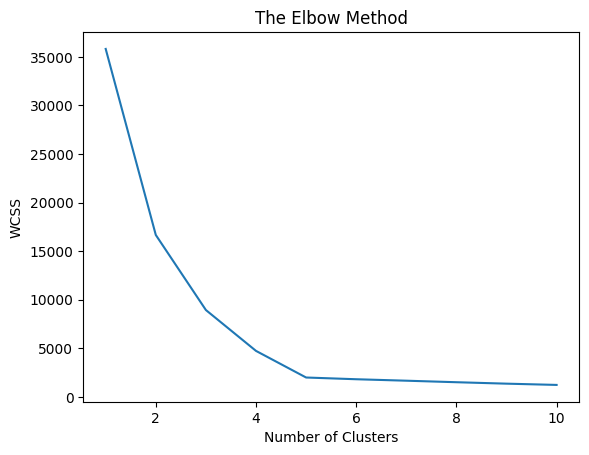

In [ ]:
# Checking the best number of clusters (Using Elbow method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 100, n_init = 10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# After choosing the optimum number of clusters ---> 5
kmeans = KMeans(n_clusters = 5, init = "k-means++", max_iter = 100, n_init = 10)
kmeans_pred_labels = kmeans.fit_predict(data)
np.unique(kmeans_pred_labels)

array([0, 1, 2, 3, 4], dtype=int32)

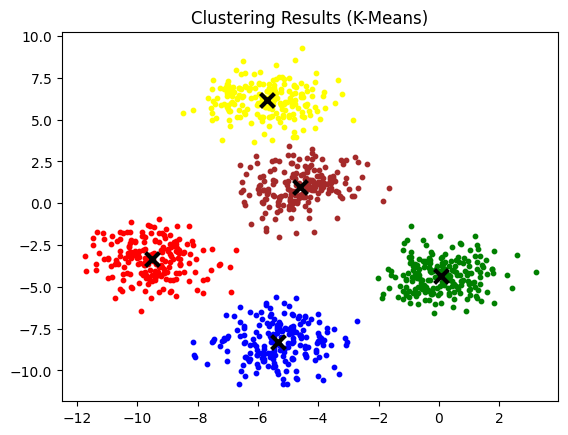

In [ ]:
plt.scatter(data[kmeans_pred_labels == 0, 0], data[kmeans_pred_labels == 0, 1], s = 10, c = "blue")
plt.scatter(data[kmeans_pred_labels == 1, 0], data[kmeans_pred_labels == 1, 1], s = 10, c = "yellow")
plt.scatter(data[kmeans_pred_labels == 2, 0], data[kmeans_pred_labels == 2, 1], s = 10, c = "red")
plt.scatter(data[kmeans_pred_labels == 3, 0], data[kmeans_pred_labels == 3, 1], s = 10, c = "green")
plt.scatter(data[kmeans_pred_labels == 4, 0], data[kmeans_pred_labels == 4, 1], s = 10, c = "brown")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "black", marker = "x", linewidths=3)
plt.title("Clustering Results (K-Means)")
plt.show()

In [ ]:
silhouette = silhouette_score(data, kmeans_pred_labels)
adjusted_rand = adjusted_rand_score(labels, kmeans_pred_labels)
calinski = calinski_harabasz_score(data, kmeans_pred_labels)
completeness = completeness_score(labels, kmeans_pred_labels)

print("\033[1m\tKMeans Evaluation\033[0m")
print(f"silhouette_score: {silhouette} \nadjusted_rand_score: {adjusted_rand} \ncalinski_harabasz_score: {calinski} \ncompleteness_score: {completeness}")

	KMeans Evaluation
silhouette_score: 0.6851847361411625 
adjusted_rand_score: 0.9974962343264018 
calinski_harabasz_score: 4209.471482988897 
completeness_score: 0.9960881791711383


### DBSCAN ###

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_pred_labels = dbscan.fit_predict(data)
np.unique(dbscan_pred_labels)

array([-1,  0,  1,  2,  3,  4])

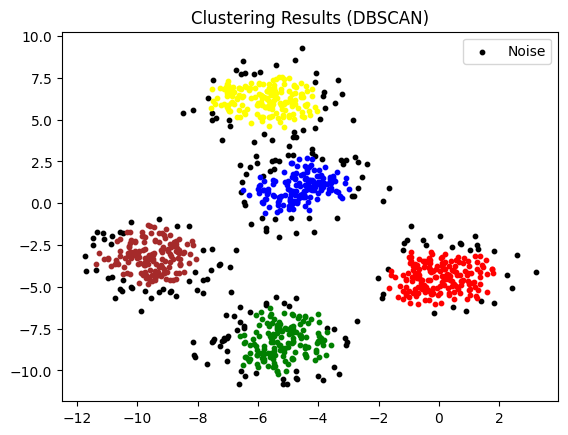

In [ ]:
plt.scatter(data[dbscan_pred_labels == -1, 0], data[dbscan_pred_labels == -1, 1], s = 10, c = "black", label = "Noise")
plt.scatter(data[dbscan_pred_labels == 0, 0], data[dbscan_pred_labels == 0, 1], s = 10, c = "blue")
plt.scatter(data[dbscan_pred_labels == 1, 0], data[dbscan_pred_labels == 1, 1], s = 10, c = "yellow")
plt.scatter(data[dbscan_pred_labels == 2, 0], data[dbscan_pred_labels == 2, 1], s = 10, c = "red")
plt.scatter(data[dbscan_pred_labels == 3, 0], data[dbscan_pred_labels == 3, 1], s = 10, c = "green")
plt.scatter(data[dbscan_pred_labels == 4, 0], data[dbscan_pred_labels == 4, 1], s = 10, c = "brown")

plt.legend()
plt.title("Clustering Results (DBSCAN)")
plt.show()

In [ ]:
silhouette = silhouette_score(data, dbscan_pred_labels)
adjusted_rand = adjusted_rand_score(labels, dbscan_pred_labels)
calinski = calinski_harabasz_score(data, dbscan_pred_labels)
completeness = completeness_score(labels, dbscan_pred_labels)

print("\033[1m\tDBSCAN Evaluation\033[0m")
print(f"silhouette_score: {silhouette} \nadjusted_rand_score: {adjusted_rand} \ncalinski_harabasz_score: {calinski} \ncompleteness_score: {completeness}")

	DBSCAN Evaluation
silhouette_score: 0.4617810615484882 
adjusted_rand_score: 0.6736169953508265 
calinski_harabasz_score: 615.3538485699131 
completeness_score: 0.7187048758280394


### HDBSCAN ###

array([-1,  0,  1,  2,  3,  4])

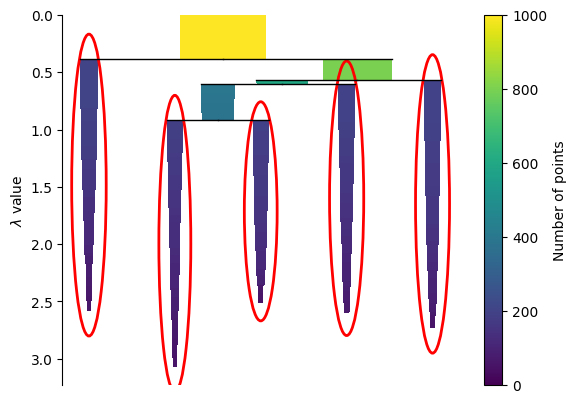

In [ ]:
import hdbscan

hdbscan = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=10)
hdbscan_pred_labels = hdbscan.fit_predict(data)

hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(hdbscan_pred_labels)

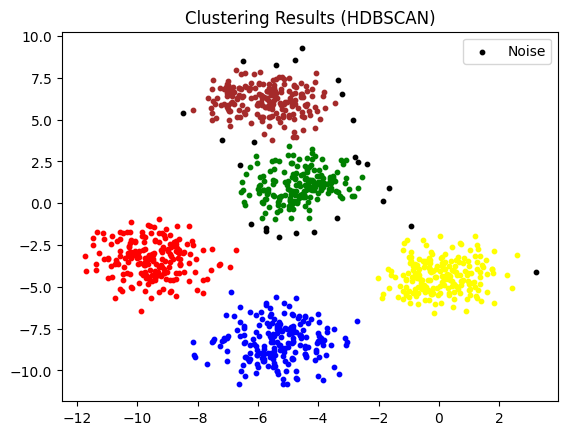

In [ ]:
plt.scatter(data[hdbscan_pred_labels == -1, 0], data[hdbscan_pred_labels == -1, 1], s = 10, c = "black", label = "Noise")
plt.scatter(data[hdbscan_pred_labels == 0, 0], data[hdbscan_pred_labels == 0, 1], s = 10, c = "blue")
plt.scatter(data[hdbscan_pred_labels == 1, 0], data[hdbscan_pred_labels == 1, 1], s = 10, c = "yellow")
plt.scatter(data[hdbscan_pred_labels == 2, 0], data[hdbscan_pred_labels == 2, 1], s = 10, c = "red")
plt.scatter(data[hdbscan_pred_labels == 3, 0], data[hdbscan_pred_labels == 3, 1], s = 10, c = "green")
plt.scatter(data[hdbscan_pred_labels == 4, 0], data[hdbscan_pred_labels == 4, 1], s = 10, c = "brown")

plt.legend()
plt.title("Clustering Results (HDBSCAN)")
plt.show()

In [ ]:
silhouette = silhouette_score(data, dbscan_pred_labels)
adjusted_rand = adjusted_rand_score(labels, dbscan_pred_labels)
calinski = calinski_harabasz_score(data, dbscan_pred_labels)
completeness = completeness_score(labels, dbscan_pred_labels)

print("\033[1m\tDBSCAN Evaluation\033[0m")
print(f"silhouette_score: {silhouette} \nadjusted_rand_score: {adjusted_rand} \ncalinski_harabasz_score: {calinski} \ncompleteness_score: {completeness}")

	DBSCAN Evaluation
silhouette_score: 0.4617810615484882 
adjusted_rand_score: 0.6736169953508265 
calinski_harabasz_score: 615.3538485699131 
completeness_score: 0.7187048758280394


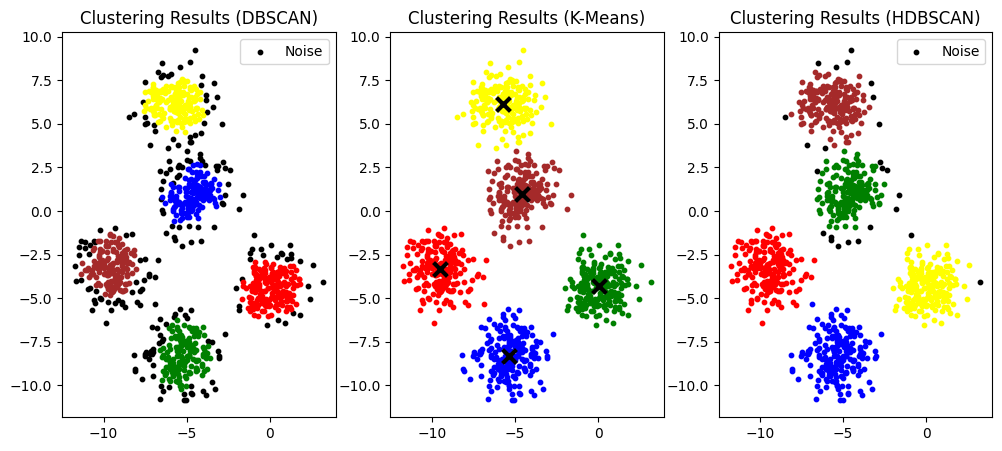

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 3, 1)
plt.scatter(data[dbscan_pred_labels == -1, 0], data[dbscan_pred_labels == -1, 1], s = 10, c = "black", label = "Noise")
plt.scatter(data[dbscan_pred_labels == 0, 0], data[dbscan_pred_labels == 0, 1], s = 10, c = "blue")
plt.scatter(data[dbscan_pred_labels == 1, 0], data[dbscan_pred_labels == 1, 1], s = 10, c = "yellow")
plt.scatter(data[dbscan_pred_labels == 2, 0], data[dbscan_pred_labels == 2, 1], s = 10, c = "red")
plt.scatter(data[dbscan_pred_labels == 3, 0], data[dbscan_pred_labels == 3, 1], s = 10, c = "green")
plt.scatter(data[dbscan_pred_labels == 4, 0], data[dbscan_pred_labels == 4, 1], s = 10, c = "brown")

plt.legend()
plt.title("Clustering Results (DBSCAN)")

plt.subplot(1, 3, 2)
plt.scatter(data[kmeans_pred_labels == 0, 0], data[kmeans_pred_labels == 0, 1], s = 10, c = "blue")
plt.scatter(data[kmeans_pred_labels == 1, 0], data[kmeans_pred_labels == 1, 1], s = 10, c = "yellow")
plt.scatter(data[kmeans_pred_labels == 2, 0], data[kmeans_pred_labels == 2, 1], s = 10, c = "red")
plt.scatter(data[kmeans_pred_labels == 3, 0], data[kmeans_pred_labels == 3, 1], s = 10, c = "green")
plt.scatter(data[kmeans_pred_labels == 4, 0], data[kmeans_pred_labels == 4, 1], s = 10, c = "brown")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "black", marker = "x", linewidths=3)
plt.title("Clustering Results (K-Means)")


plt.subplot(1, 3, 3)
plt.scatter(data[hdbscan_pred_labels == -1, 0], data[hdbscan_pred_labels == -1, 1], s = 10, c = "black", label = "Noise")
plt.scatter(data[hdbscan_pred_labels == 0, 0], data[hdbscan_pred_labels == 0, 1], s = 10, c = "blue")
plt.scatter(data[hdbscan_pred_labels == 1, 0], data[hdbscan_pred_labels == 1, 1], s = 10, c = "yellow")
plt.scatter(data[hdbscan_pred_labels == 2, 0], data[hdbscan_pred_labels == 2, 1], s = 10, c = "red")
plt.scatter(data[hdbscan_pred_labels == 3, 0], data[hdbscan_pred_labels == 3, 1], s = 10, c = "green")
plt.scatter(data[hdbscan_pred_labels == 4, 0], data[hdbscan_pred_labels == 4, 1], s = 10, c = "brown")

plt.legend()
plt.title("Clustering Results (HDBSCAN)")

plt.show()

## Real-World Dataset

In [ ]:
df = pd.read_csv("./california_housing_train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         17000 non-null  float64
 1   latitude          17000 non-null  float64
 2   housingMedianAge  17000 non-null  int64  
 3   totalRooms        17000 non-null  int64  
 4   totalBedrooms     17000 non-null  int64  
 5   population        17000 non-null  int64  
 6   households        17000 non-null  int64  
 7   medianIncome      17000 non-null  float64
 8   medianHouseValue  17000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.2 MB


In [ ]:
df.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500


In [ ]:
df.shape

(17000, 9)

In [ ]:
data = df.iloc[:, 0:2].values
data.shape

(17000, 2)

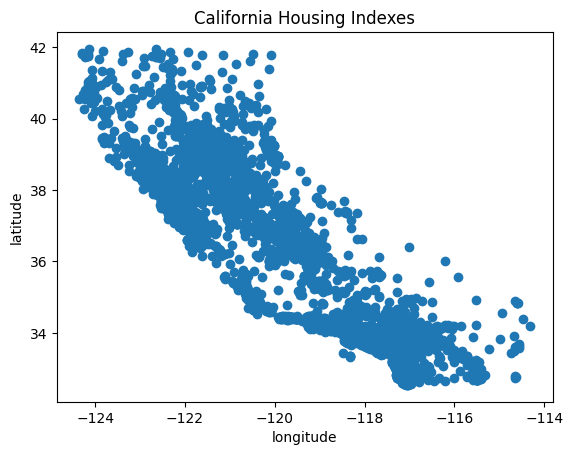

In [ ]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("California Housing Indexes")
plt.show()

### DBSCAN ###

In [ ]:
dbscan = DBSCAN(eps=0.29, min_samples=15)
dbscan_pred_labels = dbscan.fit_predict(data)
np.unique(dbscan_pred_labels)

array([-1,  0,  1,  2,  3,  4])

In [ ]:
df["Cluster"] = dbscan.labels_
df

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,Cluster
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900,-1
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100,-1
2,-114.56,33.69,17,720,174,333,117,1.6509,85700,-1
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400,-1
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500,-1
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400,4
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000,4
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600,-1
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800,-1


In [ ]:
df['Cluster'].value_counts()

 0    9416
 2    7215
-1     213
 4     103
 3      31
 1      22
Name: Cluster, dtype: int64

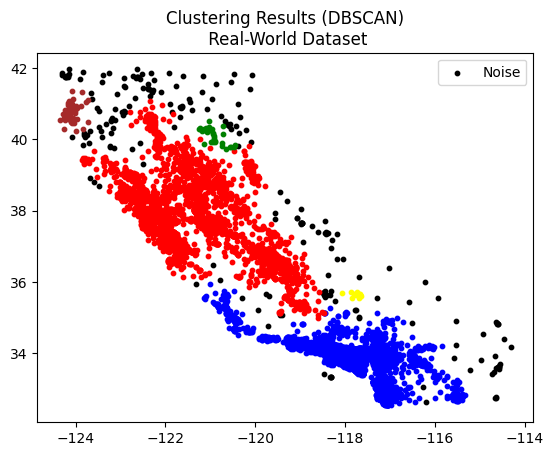

In [ ]:
plt.scatter(data[dbscan_pred_labels == -1, 0], data[dbscan_pred_labels == -1, 1], s = 10, c = "black", label = "Noise")
plt.scatter(data[dbscan_pred_labels == 0, 0], data[dbscan_pred_labels == 0, 1], s = 10, c = "blue")
plt.scatter(data[dbscan_pred_labels == 1, 0], data[dbscan_pred_labels == 1, 1], s = 10, c = "yellow")
plt.scatter(data[dbscan_pred_labels == 2, 0], data[dbscan_pred_labels == 2, 1], s = 10, c = "red")
plt.scatter(data[dbscan_pred_labels == 3, 0], data[dbscan_pred_labels == 3, 1], s = 10, c = "green")
plt.scatter(data[dbscan_pred_labels == 4, 0], data[dbscan_pred_labels == 4, 1], s = 10, c = "brown")


plt.legend()
plt.title("Clustering Results (DBSCAN)\n Real-World Dataset")
plt.show()

In [ ]:
silhouette = silhouette_score(data, dbscan_pred_labels)
calinski = calinski_harabasz_score(data, dbscan_pred_labels)
print("\033[1m\tDBSCAN Evaluation\033[0m")
print(f"silhouette_score: {silhouette} \ncalinski_harabasz_score: {calinski}")

	DBSCAN Evaluation
silhouette_score: 0.40190626984468214 
calinski_harabasz_score: 16806.94575744299


### K-Means ###

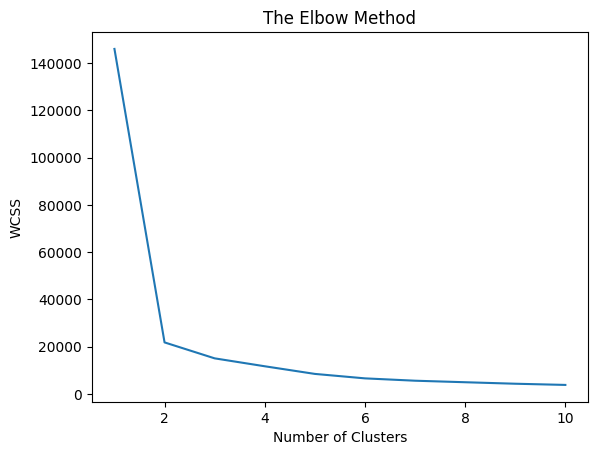

In [ ]:
# Checking the best number of clusters (Using Elbow method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 100, n_init = 10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [1]:
KMeans?

Object `KMeans` not found.


In [ ]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", max_iter = 100, n_init = 10)
kmeans_pred_labels = kmeans.fit_predict(data)
np.unique(kmeans_pred_labels)

array([0, 1, 2, 3, 4], dtype=int32)

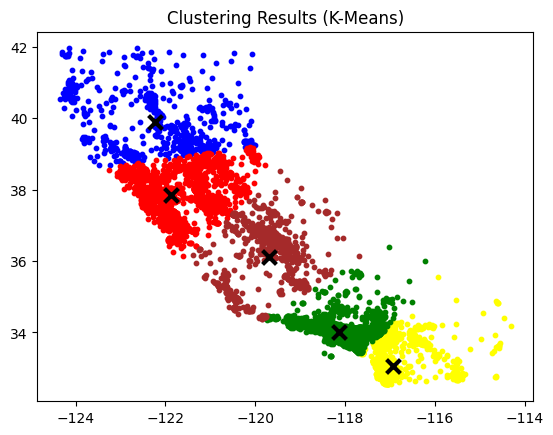

In [ ]:
plt.scatter(data[kmeans_pred_labels == 0, 0], data[kmeans_pred_labels == 0, 1], s = 10, c = "blue")
plt.scatter(data[kmeans_pred_labels == 1, 0], data[kmeans_pred_labels == 1, 1], s = 10, c = "yellow")
plt.scatter(data[kmeans_pred_labels == 2, 0], data[kmeans_pred_labels == 2, 1], s = 10, c = "red")
plt.scatter(data[kmeans_pred_labels == 3, 0], data[kmeans_pred_labels == 3, 1], s = 10, c = "green")
plt.scatter(data[kmeans_pred_labels == 4, 0], data[kmeans_pred_labels == 4, 1], s = 10, c = "brown")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "black", marker = "x", linewidths=3)
plt.title("Clustering Results (K-Means)")
plt.show()

In [ ]:
silhouette = silhouette_score(data, kmeans_pred_labels)
calinski = calinski_harabasz_score(data, kmeans_pred_labels)

print("\033[1m\tK-Means Evaluation\033[0m")
print(f"silhouette_score: {silhouette} \ncalinski_harabasz_score: {calinski}")

	K-Means Evaluation
silhouette_score: 0.5818459140285102 
calinski_harabasz_score: 68541.98926245925


### HDBSCAN ###

array([-1,  0,  1,  2,  3,  4,  5])

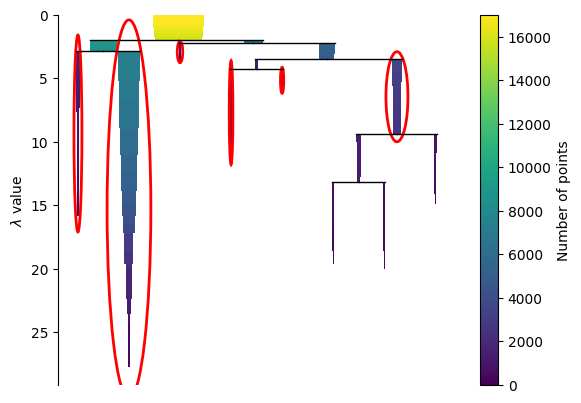

In [ ]:
import hdbscan

hdbscan = hdbscan.HDBSCAN (min_cluster_size = 400, min_samples = 150)
hdbscan_pred_labels = hdbscan.fit_predict(data)
hdbscan.condensed_tree_.plot(select_clusters = True, selection_palette=sns.color_palette('deep', 8))
np.unique(hdbscan_pred_labels)

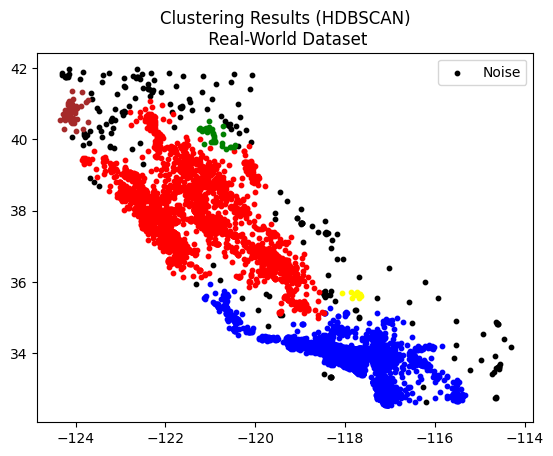

In [ ]:
plt.scatter(data[dbscan_pred_labels == -1, 0], data[dbscan_pred_labels == -1, 1], s = 10, c = "black", label = "Noise")
plt.scatter(data[dbscan_pred_labels == 0, 0], data[dbscan_pred_labels == 0, 1], s = 10, c = "blue")
plt.scatter(data[dbscan_pred_labels == 1, 0], data[dbscan_pred_labels == 1, 1], s = 10, c = "yellow")
plt.scatter(data[dbscan_pred_labels == 2, 0], data[dbscan_pred_labels == 2, 1], s = 10, c = "red")
plt.scatter(data[dbscan_pred_labels == 3, 0], data[dbscan_pred_labels == 3, 1], s = 10, c = "green")
plt.scatter(data[dbscan_pred_labels == 4, 0], data[dbscan_pred_labels == 4, 1], s = 10, c = "brown")
plt.scatter(data[dbscan_pred_labels == 5, 0], data[dbscan_pred_labels == 5, 1], s = 10, c = "pink")



plt.legend()
plt.title("Clustering Results (HDBSCAN)\n Real-World Dataset")
plt.show()

In [ ]:
silhouette = silhouette_score(data, kmeans_pred_labels)
calinski = calinski_harabasz_score(data, kmeans_pred_labels)

print("\033[1m\tHDBSCAN Evaluation\033[0m")
print(f"silhouette_score: {silhouette} \ncalinski_harabasz_score: {calinski}")

	HDBSCAN Evaluation
silhouette_score: 0.5818459140285102 
calinski_harabasz_score: 68541.98926245925


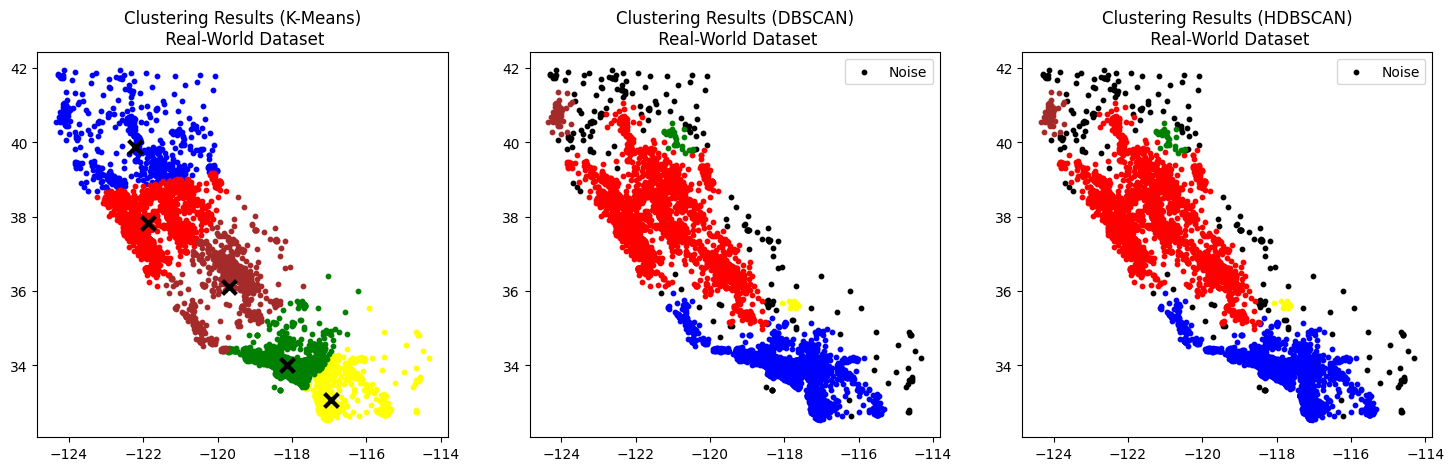

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(data[kmeans_pred_labels == 0, 0], data[kmeans_pred_labels == 0, 1], s = 10, c = "blue")
plt.scatter(data[kmeans_pred_labels == 1, 0], data[kmeans_pred_labels == 1, 1], s = 10, c = "yellow")
plt.scatter(data[kmeans_pred_labels == 2, 0], data[kmeans_pred_labels == 2, 1], s = 10, c = "red")
plt.scatter(data[kmeans_pred_labels == 3, 0], data[kmeans_pred_labels == 3, 1], s = 10, c = "green")
plt.scatter(data[kmeans_pred_labels == 4, 0], data[kmeans_pred_labels == 4, 1], s = 10, c = "brown")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "black", marker = "x", linewidths=3)
plt.title("Clustering Results (K-Means)\n Real-World Dataset")


plt.subplot(1, 3, 2)
plt.scatter(data[dbscan_pred_labels == -1, 0], data[dbscan_pred_labels == -1, 1], s = 10, c = "black", label = "Noise")
plt.scatter(data[dbscan_pred_labels == 0, 0], data[dbscan_pred_labels == 0, 1], s = 10, c = "blue")
plt.scatter(data[dbscan_pred_labels == 1, 0], data[dbscan_pred_labels == 1, 1], s = 10, c = "yellow")
plt.scatter(data[dbscan_pred_labels == 2, 0], data[dbscan_pred_labels == 2, 1], s = 10, c = "red")
plt.scatter(data[dbscan_pred_labels == 3, 0], data[dbscan_pred_labels == 3, 1], s = 10, c = "green")
plt.scatter(data[dbscan_pred_labels == 4, 0], data[dbscan_pred_labels == 4, 1], s = 10, c = "brown")

plt.legend()
plt.title("Clustering Results (DBSCAN)\n Real-World Dataset")


plt.subplot(1, 3, 3)
plt.scatter(data[dbscan_pred_labels == -1, 0], data[dbscan_pred_labels == -1, 1], s = 10, c = "black", label = "Noise")
plt.scatter(data[dbscan_pred_labels == 0, 0], data[dbscan_pred_labels == 0, 1], s = 10, c = "blue")
plt.scatter(data[dbscan_pred_labels == 1, 0], data[dbscan_pred_labels == 1, 1], s = 10, c = "yellow")
plt.scatter(data[dbscan_pred_labels == 2, 0], data[dbscan_pred_labels == 2, 1], s = 10, c = "red")
plt.scatter(data[dbscan_pred_labels == 3, 0], data[dbscan_pred_labels == 3, 1], s = 10, c = "green")
plt.scatter(data[dbscan_pred_labels == 4, 0], data[dbscan_pred_labels == 4, 1], s = 10, c = "brown")
plt.scatter(data[dbscan_pred_labels == 5, 0], data[dbscan_pred_labels == 5, 1], s = 10, c = "pink")

plt.legend()
plt.title("Clustering Results (HDBSCAN)\n Real-World Dataset")

plt.show()